# Problem Statement

Predicting the presence of heart disease in the particular patient by checking various attributes.
As there are 4 values in our target variable, will opt for calssification model for predicting our target-'num'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Have made the headings in the csv file according to the problem statement.

In [2]:
df=pd.read_csv("Heartdisease_data.csv")
df

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


Knowing about the columns:
    
    1. Age:age in years 
    2. sex (1 = male; 0 = female)
    3. cp: chest pain type
        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomati
    4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    5. chol: serum cholestoral in mg/dl
    6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    7. restecg: resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    8. thalach: maximum heart rate achieved
    9. exang: exercise induced angina (1 = yes; 0 = no)
    10. oldpeak = ST depression induced by exercise relative to rest
    11. slope: the slope of the peak exercise ST segment
    Value 1: upsloping
    Value 2: flat
    Value 3: downsloping
    12. ca: number of major vessels (0-3) colored by flourosopy
    13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    14. Target Variable-'num':The "num" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4(presence)
        
        
        Above are the various parameters which is useful for detecting the presence of Heart disease in a particular person.
        Will be checking which column has the highest correlation with our target variable and do the analysis accordingly.

We can see the presence of '?'which is a Null value, need to convert the same to Nan and then remove these Nan values from data or replace them.

In [3]:
df.shape

(200, 14)

# Data Preparation

In [4]:
df.isnull().sum()

Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

No null value showing but have observed '?' observed above which needs to be converted first.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       200 non-null    int64 
 1   Sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


it shows from info that there are no missing values but ? is present so will encode that first.

In [6]:
#Replacing question marks with NaN
df= df.replace('?',np.nan)
df

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
df.isnull().values.any()

True

In [8]:
df.isnull().sum()

Age           0
Sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

Now, the NaN values has been fetched which needs to be treated. As we already have less data we wont be removing them, will be replacing them.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       200 non-null    int64 
 1   Sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  144 non-null    object
 4   chol      193 non-null    object
 5   fbs       193 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   147 non-null    object
 8   exang     147 non-null    object
 9   oldpeak   144 non-null    object
 10  slope     98 non-null     object
 11  ca        2 non-null      object
 12  thal      34 non-null     object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


Observation:
    The above summary shows that 'trestbps', 'chol', 'fbs','thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal' have null values presence.
        All the above columns are object type, hence replacing the Nan values with the 'mode' value

In [10]:
#replacing missing values with mode

for col in ['trestbps', 'chol', 'fbs','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [11]:
df.isnull().values.any()

False

Now, the Null values has been replaced

In [12]:
df

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,0,7,2
1,44,1,4,130,209,0,1,127,0,0,2,0,7,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,7,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,7,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,2,0,7,1
196,62,1,1,120,139,0,1,120,1,0,2,0,7,0
197,55,1,4,122,223,1,1,100,0,0,2,0,6,2
198,58,1,4,120,385,1,2,120,1,0,2,0,7,0


In [13]:
#exploring target variable
df['num'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [14]:
df.num.value_counts()

1    56
0    51
3    42
2    41
4    10
Name: num, dtype: int64

In [15]:
df

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,0,7,2
1,44,1,4,130,209,0,1,127,0,0,2,0,7,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,7,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,7,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,2,0,7,1
196,62,1,1,120,139,0,1,120,1,0,2,0,7,0
197,55,1,4,122,223,1,1,100,0,0,2,0,6,2
198,58,1,4,120,385,1,2,120,1,0,2,0,7,0


In [16]:
df.dtypes

Age          int64
Sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [17]:
#Changing the datatypes object to float 

In [18]:
cols_object_float=['trestbps', 'chol', 'fbs','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
for col in cols_object_float:
    df[col]=df[col].astype(float)

# Summary Statistics

In [19]:
df.describe()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000
mean,59.350000,0.970000,3.505000,129.910000,172.490000,0.340000,0.735000,122.055000,0.740000,0.951000,2.065000,0.0,6.880000,1.520000
std,7.811697,0.171015,0.795701,19.280055,116.752497,0.474898,0.683455,18.876269,0.439735,1.110344,0.471046,0.0,0.589353,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.0,3.000000,0.000000
25%,55.000000,1.000000,3.000000,120.000000,0.000000,0.000000,0.000000,112.000000,0.000000,0.000000,2.000000,0.0,7.000000,0.000000
50%,60.000000,1.000000,4.000000,123.000000,214.000000,0.000000,1.000000,120.000000,1.000000,0.500000,2.000000,0.0,7.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,2.000000,0.0,7.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,0.0,7.000000,4.000000


Observations:
    1. minimum age is 35 yrs and maximum age is 77 yrs
    2. mean is greater than median in 'thalack', 'oldpeak','slope', 'trestbps', therefore these variables data are right skewed.
    3. There is large diff. between mean, median and max of these columns:'chol','thalach'. Hence, outliers are present.
    4. 'ca' column has only 1 value-'0'

# Data Visualization

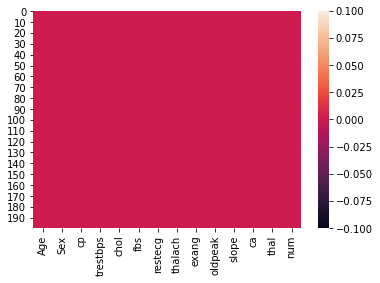

In [20]:
#Checking missing values
sns.heatmap(df.isnull())

No null values

In [21]:
dfcor=df.corr()
dfcor

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
Age,1.000000,0.034230,-0.038280,0.167637,0.049923,0.135728,0.002400,-0.150146,0.129027,0.134659,0.107135,NaN,0.106313,0.287289
Sex,0.034230,1.000000,0.038036,-0.002347,-0.101693,-0.059400,0.060621,-0.004156,0.029402,0.058379,0.086709,NaN,-0.035898,0.147470
cp,-0.038280,0.038036,1.000000,0.139569,0.048981,-0.044416,0.034790,-0.108585,0.089904,0.186268,0.059460,NaN,-0.009430,0.168210
trestbps,0.167637,-0.002347,0.139569,1.000000,0.126037,0.159776,0.077503,0.014484,0.084356,0.250914,0.099138,NaN,0.024253,0.149265
chol,0.049923,-0.101693,0.048981,0.126037,1.000000,0.156311,0.002391,-0.058601,0.115446,-0.060076,0.049033,NaN,-0.046976,0.058451
fbs,0.135728,-0.059400,-0.044416,0.159776,0.156311,1.000000,0.170616,0.033219,-0.176144,-0.138832,-0.009435,NaN,-0.033036,0.048940
restecg,0.002400,0.060621,0.034790,0.077503,0.002391,0.170616,1.000000,0.010094,-0.063203,-0.115200,-0.039881,NaN,0.020460,-0.032800
thalach,-0.150146,-0.004156,-0.108585,0.014484,-0.058601,0.033219,0.010094,1.000000,-0.093316,0.140268,-0.101567,NaN,-0.185506,-0.073072
exang,0.129027,0.029402,0.089904,0.084356,0.115446,-0.176144,-0.063203,-0.093316,1.000000,0.073608,0.106259,NaN,0.150467,0.206541
oldpeak,0.134659,0.058379,0.186268,0.250914,-0.060076,-0.138832,-0.115200,0.140268,0.073608,1.000000,0.293395,NaN,0.075440,0.383736


From above, it can be onserved 'ca' column doesnot contributing much to our traget and has only single value, hence will drop the same.

In [22]:
#dropping not useful column
df.drop(['ca'], axis=1, inplace=True)

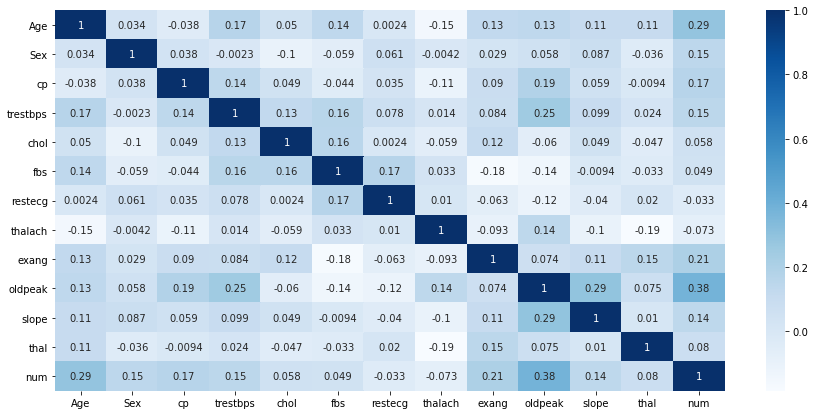

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, cmap='Blues')

Key observations:
    1. oldpeak has the maximum +ve correlation with the 'num'- 0.38, followed by 'Age'& 'exang'
    2. other columns have distributed correlation like 'Sex','cp','trestbps' & 'slope'
    3. Rest other columns has weak-/+ correlation like chol, fbs, restecg, thalach, thal

Text(0.5, 1.0, 'Correlation with target variable')

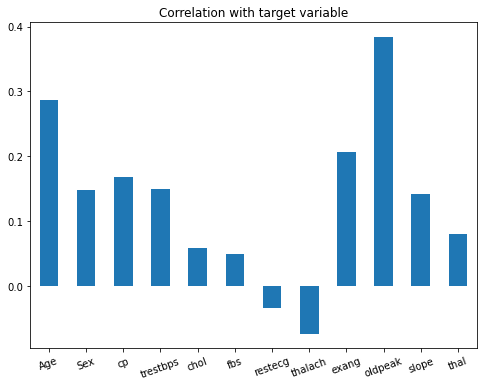

In [29]:
#Checking correlation with barplot
plt.figure(figsize=(8,6))
df.drop('num', axis=1).corrwith(df['num']).plot(kind='bar')
plt.xticks(rotation=20)
plt.title('Correlation with target variable')

It can be clearly observed that oldpeak has the highest correlation whereas thalach and restecg has negative correlation.

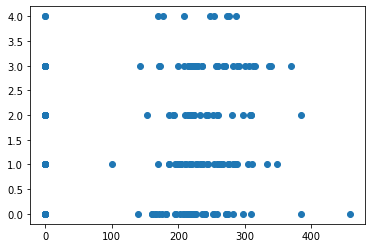

In [31]:
#bivariate analysis
plt.scatter(df['chol'],df['num'])

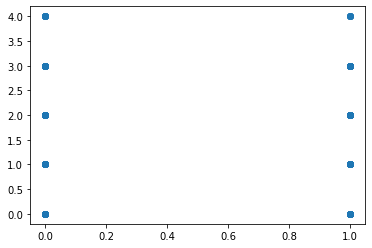

In [32]:
plt.scatter(df['fbs'],df['num'])

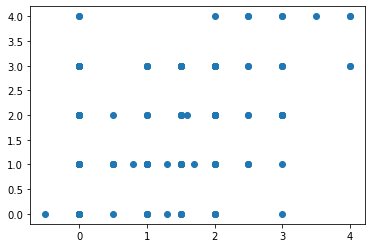

In [33]:

plt.scatter(df['oldpeak'],df['num'])

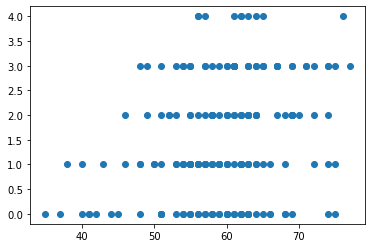

In [34]:
plt.scatter(df['Age'],df['num'])

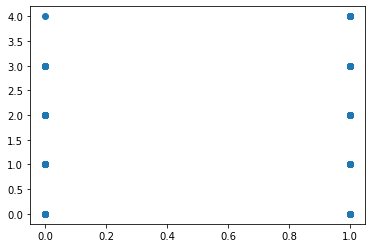

In [35]:
plt.scatter(df['exang'],df['num'])

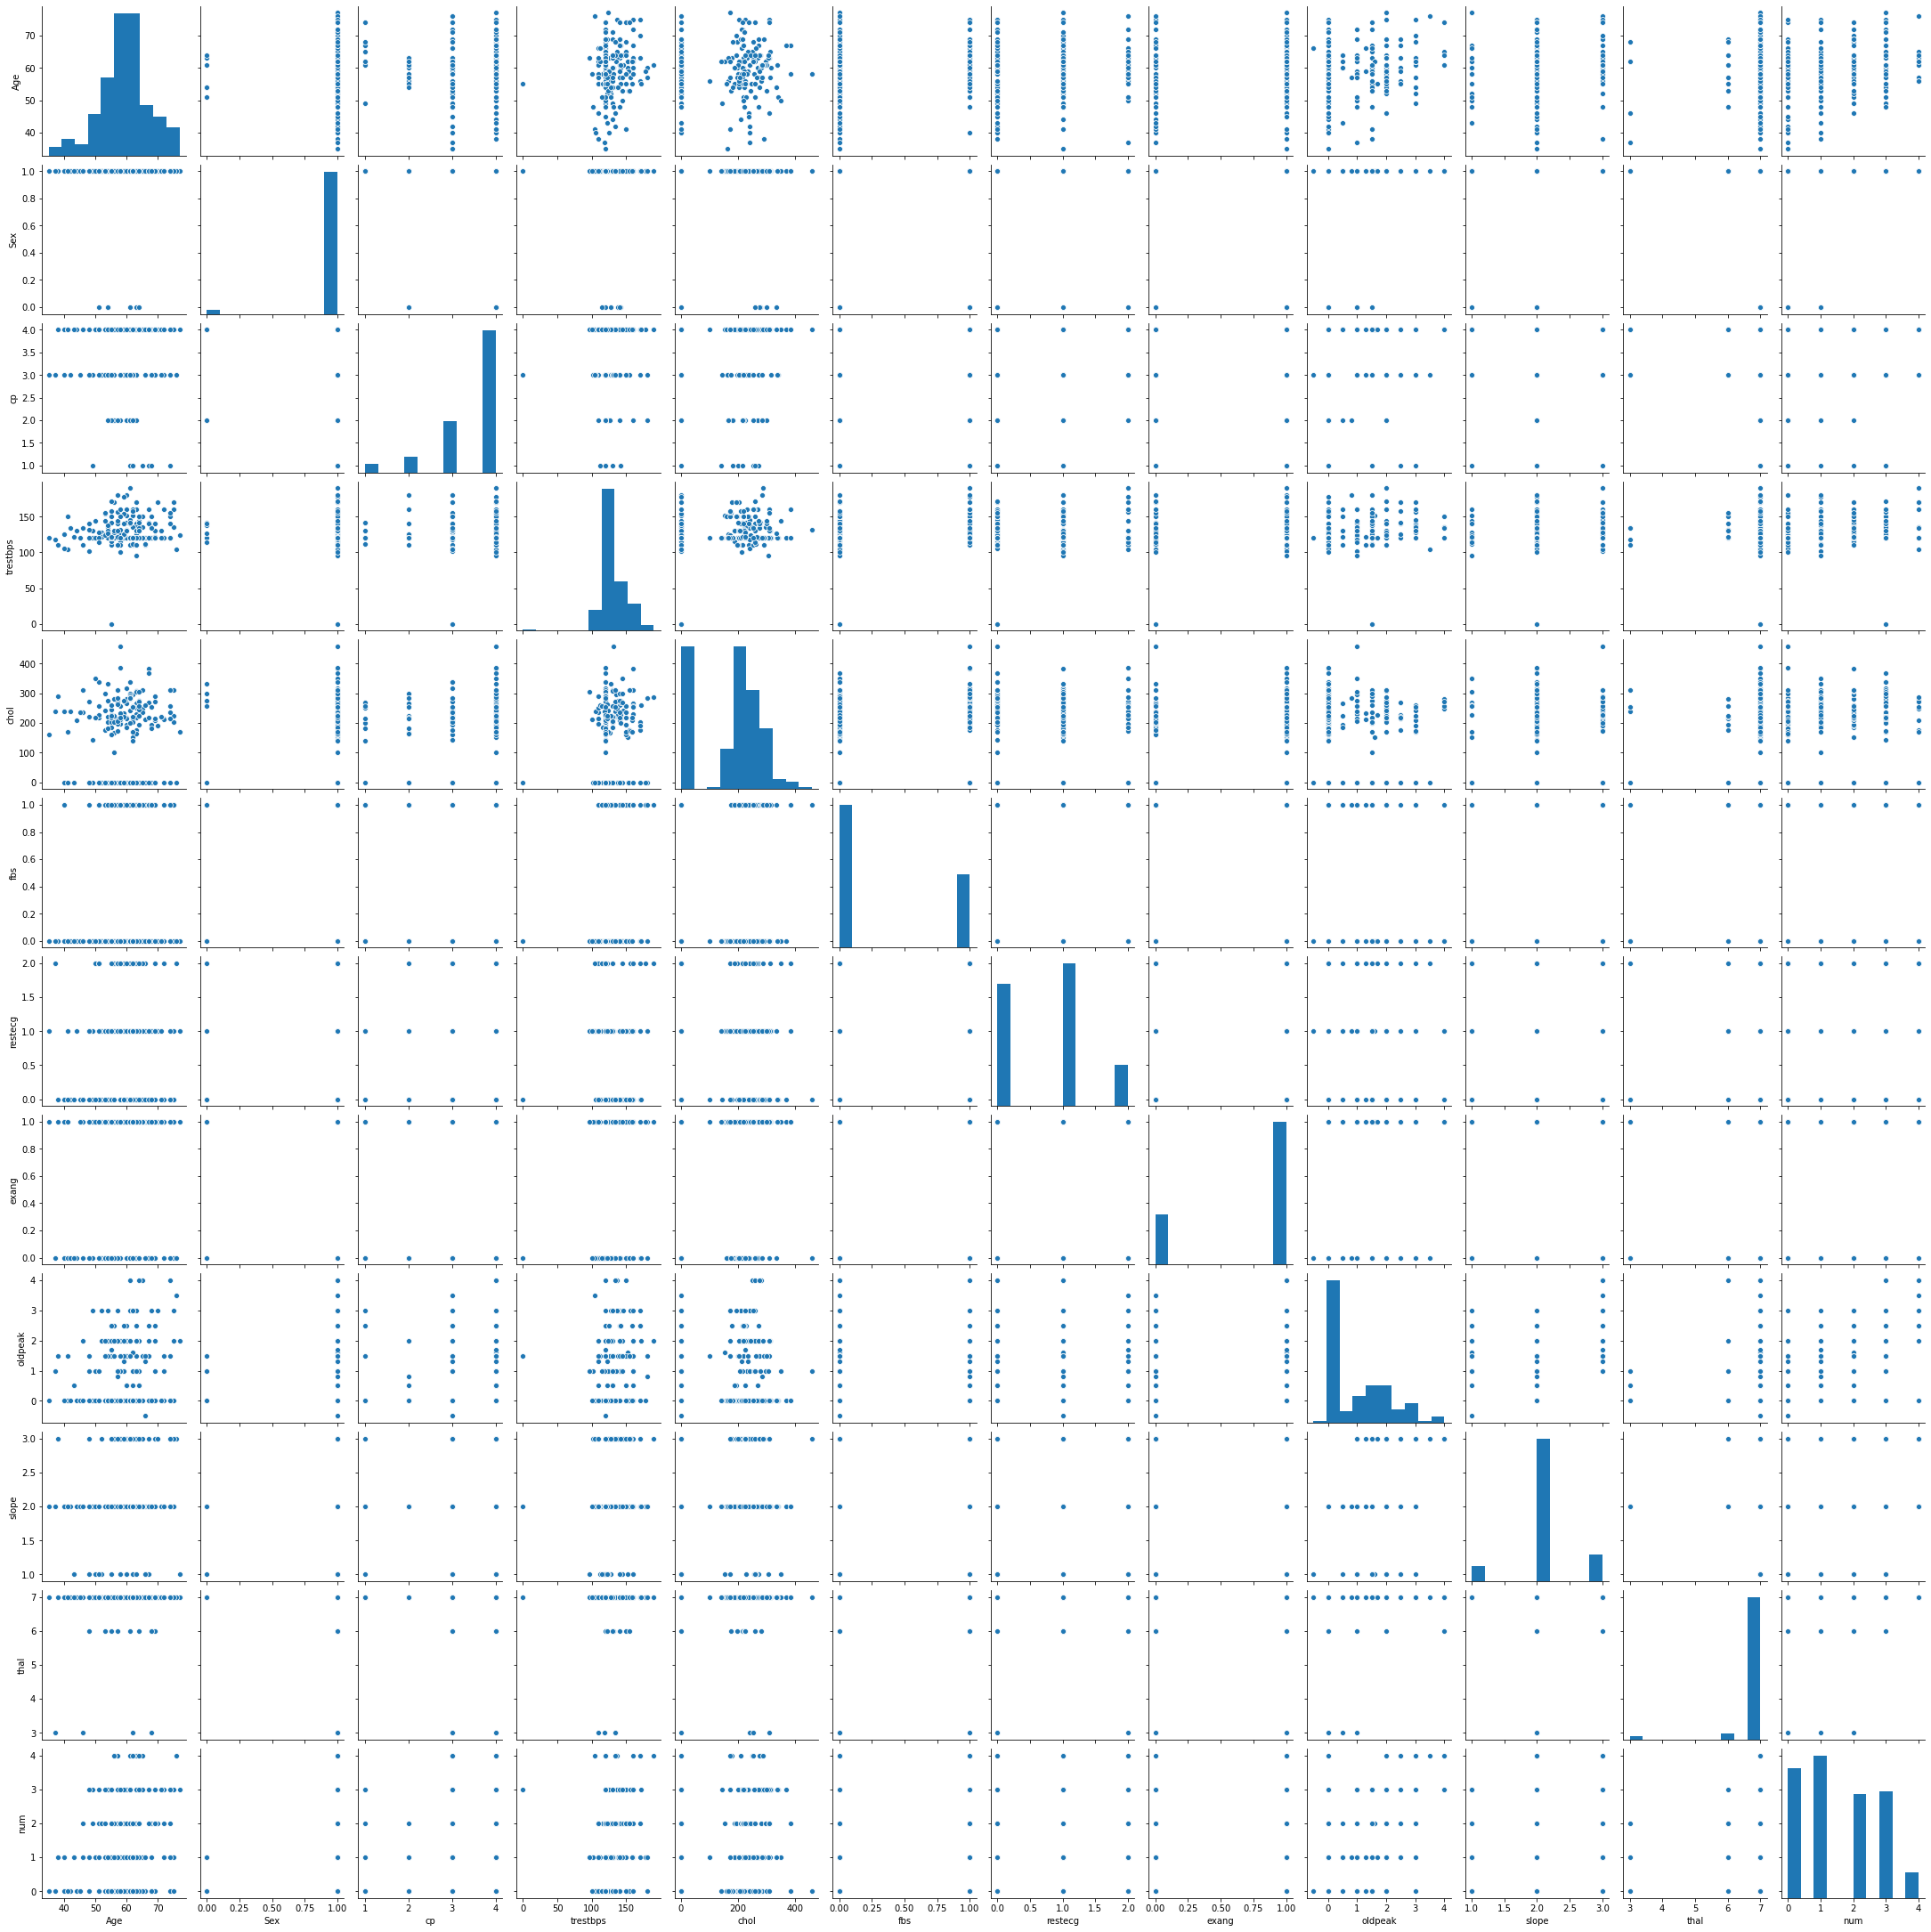

In [48]:
sns.pairplot(df)

In [ ]:
#dropping non-correlated column and this column has outliers too
df.drop('thalach', axis=1,inplace=True)

# checking & treating outliers

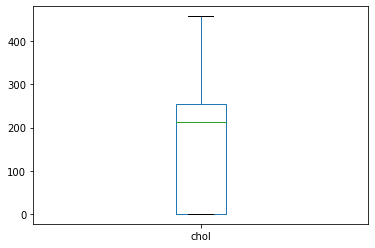

In [38]:
#univariate analysis
df['chol'].plot.box()

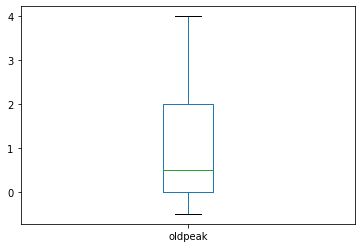

In [39]:
df['oldpeak'].plot.box()

In [40]:
collist=df.columns.values
ncol=12
nrows=10

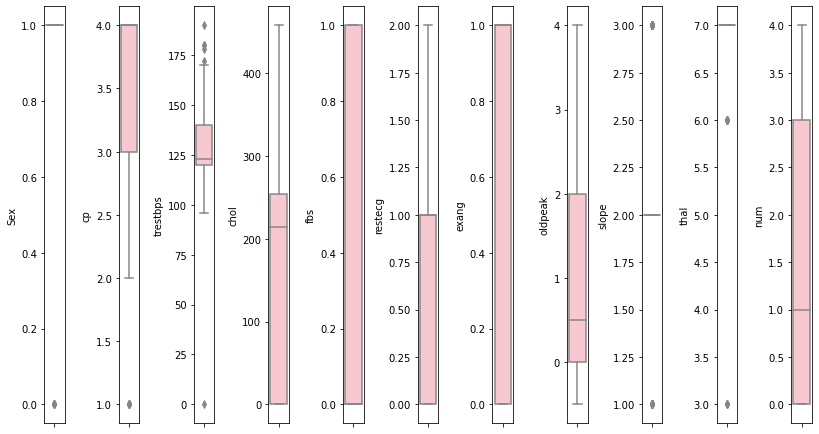

In [41]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='pink',orient='v')
    plt.tight_layout()

In [ ]:
few outliers are present in Sex, trestbps, slope and thal which needs to be treated.

# Checking distribution of skewness

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.46842053, 0.17586311, 0.62365375, ..., 0.13833702, 0.20412415,
        0.3946109 ],
       [1.96993293, 0.17586311, 0.62365375, ..., 0.13833702, 0.20412415,
        1.24960118],
       [0.08341736, 0.17586311, 0.62365375, ..., 1.9899248 , 0.20412415,
        0.3946109 ],
       ...,
       [0.55825461, 0.17586311, 0.62365375, ..., 0.13833702, 1.4969104 ,
        0.3946109 ],
       [0.17325143, 0.17586311, 0.62365375, ..., 0.13833702, 0.20412415,
        1.24960118],
       [0.34008614, 0.17586311, 1.8961594 , ..., 0.13833702, 0.20412415,
        0.42749514]])

In [43]:
threshold=3
print(np.where(z>3))

(array([ 12,  33,  51,  66,  72,  76,  79,  96,  97, 126, 128, 131, 133,
       137, 171, 176, 189, 190, 194, 195, 196], dtype=int64), array([10,  3,  1,  2,  2,  2,  1,  0,  2,  1,  1,  2,  2,  2, 10,  3, 10,
        1, 10,  1,  2], dtype=int64))


In [44]:
df_new=df[(z<3).all(axis=1)]

In [45]:
df_new

,Age,Sex,cp,trestbps,chol,fbs,restecg,exang,oldpeak,slope,thal,num
0,63,1,4,140.0,260.0,0.0,1,1.0,3.0,2.0,7.0,2
1,44,1,4,130.0,209.0,0.0,1,0.0,0.0,2.0,7.0,0
2,60,1,4,132.0,218.0,0.0,1,1.0,1.5,3.0,7.0,2
3,55,1,4,142.0,228.0,0.0,1,1.0,2.5,1.0,7.0,1
4,66,1,3,110.0,213.0,1.0,2,1.0,1.3,2.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
192,53,1,4,144.0,300.0,1.0,1,1.0,1.5,2.0,7.0,3
193,62,1,4,158.0,170.0,0.0,1,1.0,0.0,2.0,7.0,1
197,55,1,4,122.0,223.0,1.0,1,0.0,0.0,2.0,6.0,2
198,58,1,4,120.0,385.0,1.0,2,1.0,0.0,2.0,7.0,0


In [46]:
df.shape

(200, 12)

In [47]:
Percentage_loss_of_data=((200-179)/200)*100
Percentage_loss_of_data

10.5

As the data loss is more than 5%, will try to do the model selection without removing outliers

# Checking and handling skewness

In [49]:
df.columns

Index(['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'exang',
       'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

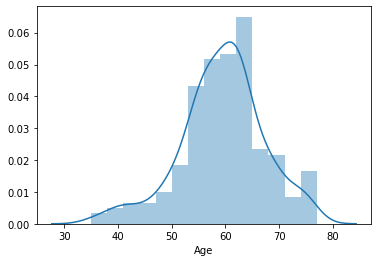

In [50]:
sns.distplot(df['Age'])

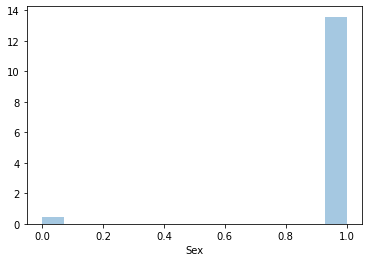

In [51]:
sns.distplot(df['Sex'])

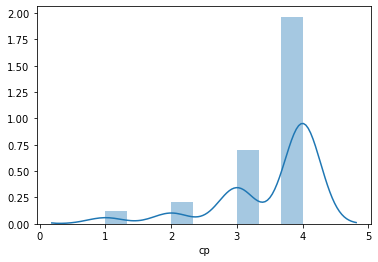

In [52]:
sns.distplot(df['cp'])

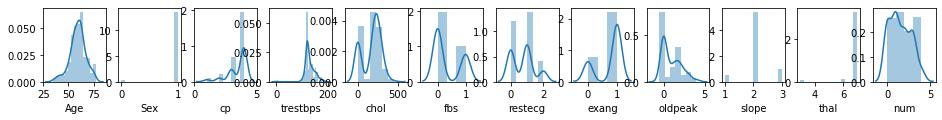

In [53]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

As can be observed, data distribution is not normalized, have to treak the skewness.

In [54]:
df.skew()

Age        -0.404091
Sex        -5.552105
cp         -1.648734
trestbps   -0.773003
chol       -0.469975
fbs         0.680636
restecg     0.391463
exang      -1.102593
oldpeak     0.823429
slope       0.210521
thal       -5.920627
num         0.297393
dtype: float64

Skweness is present in most of the columns

In [96]:
# defining the x & y
x=df_new.drop('num',axis=1)
y=df_new['num']

In [97]:
x

,Age,Sex,cp,trestbps,chol,fbs,restecg,exang,oldpeak,slope,thal
0,63,1,4,140.0,260.0,0.0,1,1.0,3.0,2.0,7.0
1,44,1,4,130.0,209.0,0.0,1,0.0,0.0,2.0,7.0
2,60,1,4,132.0,218.0,0.0,1,1.0,1.5,3.0,7.0
3,55,1,4,142.0,228.0,0.0,1,1.0,2.5,1.0,7.0
4,66,1,3,110.0,213.0,1.0,2,1.0,1.3,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
192,53,1,4,144.0,300.0,1.0,1,1.0,1.5,2.0,7.0
193,62,1,4,158.0,170.0,0.0,1,1.0,0.0,2.0,7.0
197,55,1,4,122.0,223.0,1.0,1,0.0,0.0,2.0,6.0
198,58,1,4,120.0,385.0,1.0,2,1.0,0.0,2.0,7.0


In [98]:
y

0      2
1      0
2      2
3      1
4      0
      ..
192    3
193    1
197    2
198    0
199    1
Name: num, Length: 179, dtype: int64

In [99]:
y.unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [100]:
from sklearn.preprocessing import power_transform

x=power_transform(x, method='yeo-johnson')

In [101]:
df_new.skew()

Age        -0.236754
Sex         0.000000
cp         -1.401320
trestbps    0.920598
chol       -0.417457
fbs         0.731099
restecg     0.355480
exang      -1.190725
oldpeak     0.794481
slope       0.223754
thal       -4.444345
num         0.260793
dtype: float64

In [102]:
df.skew()

Age        -0.404091
Sex        -5.552105
cp         -1.648734
trestbps   -0.773003
chol       -0.469975
fbs         0.680636
restecg     0.391463
exang      -1.102593
oldpeak     0.823429
slope       0.210521
thal       -5.920627
num         0.297393
dtype: float64

Most of the skewness has been removed

# Model Building

In [103]:
#Scaling x variables

In [104]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [105]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score

# Finding best parameters

In [106]:
#using GridSearchCV to find out best parameters in LogisticRegression

parameters={'C':[1,10],'random_state':range(42,100)}
lg=LogisticRegression()

clf=GridSearchCV(lg, parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'random_state': 42}


In [107]:
#using GridSearchCV to find out best parameters in KNeighborsClassifier

parameters={'n_neighbors':range(20,25)}
knn=KNeighborsClassifier()

clf=GridSearchCV(knn, parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 24}


In [108]:
#Models with its best parameters

LR=LogisticRegression(random_state=42)
KNN=KNeighborsClassifier(n_neighbors=24)
SVC=SVC()
GNB=GaussianNB()

In [109]:
#Checking all algorithms with their best parameters

model=[LR,KNN,SVC,GNB,DecisionTreeClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*******************************************************')
    print('\n')

Accuracy score of LogisticRegression(random_state=42) is:
0.225
[[3 6 5 0 0]
 [3 2 3 2 0]
 [0 2 3 2 0]
 [2 2 2 1 0]
 [0 0 1 1 0]]
              precision    recall  f1-score   support

           0       0.38      0.21      0.27        14
           1       0.17      0.20      0.18        10
           2       0.21      0.43      0.29         7
           3       0.17      0.14      0.15         7
           4       0.00      0.00      0.00         2

    accuracy                           0.23        40
   macro avg       0.18      0.20      0.18        40
weighted avg       0.24      0.23      0.22        40

*******************************************************


Accuracy score of KNeighborsClassifier(n_neighbors=24) is:
0.3
[[4 8 2 0 0]
 [5 3 0 2 0]
 [0 1 4 2 0]
 [2 2 2 1 0]
 [0 0 1 1 0]]
              precision    recall  f1-score   support

           0       0.36      0.29      0.32        14
           1       0.21      0.30      0.25        10
           2       0.44      0.

# Testing model building without removing outliers

In [86]:
# defining the x & y
x=df.drop('num',axis=1)
y=df['num']

In [88]:
y

0      2
1      0
2      2
3      1
4      0
      ..
195    1
196    0
197    2
198    0
199    1
Name: num, Length: 200, dtype: int64

In [89]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [90]:
parameters={'C':[1,10],'random_state':range(42,100)}
lg=LogisticRegression()

clf=GridSearchCV(lg, parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 10, 'random_state': 42}


In [91]:
parameters={'n_neighbors':range(20,25)}
knn=KNeighborsClassifier()

clf=GridSearchCV(knn, parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 21}


In [94]:
LR=LogisticRegression(random_state=42)
KNN=KNeighborsClassifier(n_neighbors=24)
SVC=SVC()
GNB=GaussianNB()

In [95]:
#Checking all algorithms with their best parameters

model=[LR,KNN,SVC,GNB,DecisionTreeClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*******************************************************')
    print('\n')

Accuracy score of LogisticRegression(random_state=42) is:
0.225
[[3 6 5 0 0]
 [3 2 3 2 0]
 [0 2 3 2 0]
 [2 2 2 1 0]
 [0 0 1 1 0]]
              precision    recall  f1-score   support

           0       0.38      0.21      0.27        14
           1       0.17      0.20      0.18        10
           2       0.21      0.43      0.29         7
           3       0.17      0.14      0.15         7
           4       0.00      0.00      0.00         2

    accuracy                           0.23        40
   macro avg       0.18      0.20      0.18        40
weighted avg       0.24      0.23      0.22        40

*******************************************************


Accuracy score of KNeighborsClassifier(n_neighbors=24) is:
0.3
[[4 8 2 0 0]
 [5 3 0 2 0]
 [0 1 4 2 0]
 [2 2 2 1 0]
 [0 0 1 1 0]]
              precision    recall  f1-score   support

           0       0.36      0.29      0.32        14
           1       0.21      0.30      0.25        10
           2       0.44      0.

# Accuracy is not more than 35%, hence will use ensemble method now on df_new only

In [112]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier


In [117]:
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*******************************************************')
    print('\n')

Accuracy score of RandomForestClassifier() is:
0.35
[[5 4 4 1 0]
 [6 1 1 2 0]
 [0 1 3 3 0]
 [1 1 1 4 0]
 [0 0 1 0 1]]
              precision    recall  f1-score   support

           0       0.42      0.36      0.38        14
           1       0.14      0.10      0.12        10
           2       0.30      0.43      0.35         7
           3       0.40      0.57      0.47         7
           4       1.00      0.50      0.67         2

    accuracy                           0.35        40
   macro avg       0.45      0.39      0.40        40
weighted avg       0.35      0.35      0.34        40

*******************************************************


Accuracy score of AdaBoostClassifier() is:
0.25
[[3 3 4 3 1]
 [4 2 2 2 0]
 [1 1 3 0 2]
 [0 2 3 1 1]
 [0 0 1 0 1]]
              precision    recall  f1-score   support

           0       0.38      0.21      0.27        14
           1       0.25      0.20      0.22        10
           2       0.23      0.43      0.30         7
    

Accuracy score of RandomForestClassifier() is:
0.375 which is the highest among the all models, hence saving the same.

# Model Saving

In [120]:
import pickle
filename= 'Heart_disease.pkl'
pickle.dump(RandomForestClassifier(), open(filename, 'wb'))